# INTELLIGENT IRRIGATION SYSTEM 

In [1]:
# Impoerting numpy for linear algebra, pandas for data processing, matplotlib and seaborn for data visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading the data
df = pd.read_csv('data.csv')
df.head()

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


In [3]:
# The data consists of crop, moisture, temperature and pump

In [4]:
df.rename(columns = {'moisture':'Humidite'}, inplace = True)
df.rename(columns = {'temp':'Temperature'}, inplace = True)
print( 'Taille(n_lignes,n_colonnes)of data frame :',df.shape)
df.head(10)

Taille(n_lignes,n_colonnes)of data frame : (200, 4)


,crop,Humidite,Temperature,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1
5,cotton,558,23,1
6,cotton,578,12,1
7,cotton,673,35,1
8,cotton,642,45,1
9,cotton,723,11,1


In [5]:
df.describe()

,Humidite,Temperature,pump
count,200.000000,200.000000,200.000000
mean,633.085000,27.750000,0.750000
std,279.077118,10.869602,0.434099
min,4.000000,10.000000,0.000000
25%,500.500000,18.000000,0.750000
50%,693.500000,28.000000,1.000000
75%,850.750000,38.000000,1.000000
max,1022.000000,45.000000,1.000000


In [6]:
df['pump'].value_counts()

pump
1    150
0     50
Name: count, dtype: int64

In [7]:
df.isnull().sum()

crop           0
Humidite       0
Temperature    0
pump           0
dtype: int64

# DATA VISUALISATION AND UNDERSTANDING

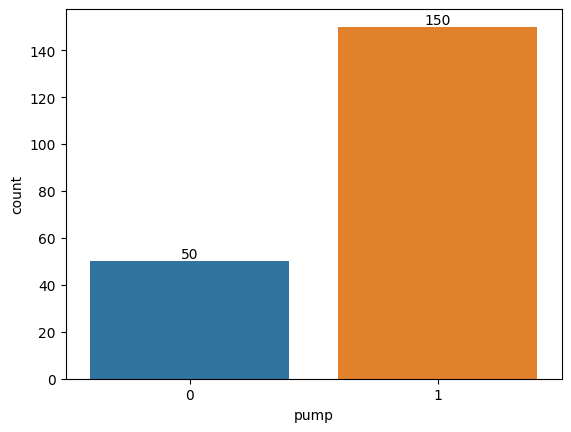

In [8]:
ax = sns.countplot(x = 'pump', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [9]:
# from the above data it is clear that 75% of cotton crops require pumps.

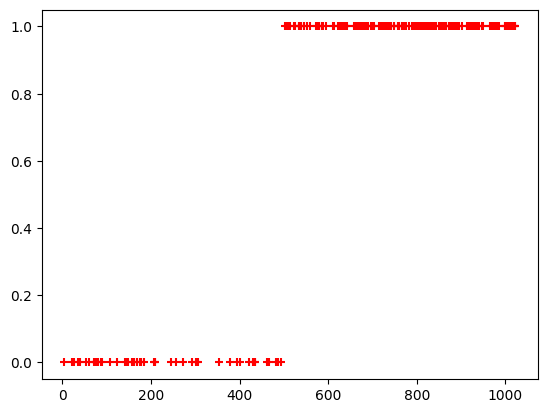

In [10]:
plt.scatter(df.Humidite,df.pump,marker='+',color='red')

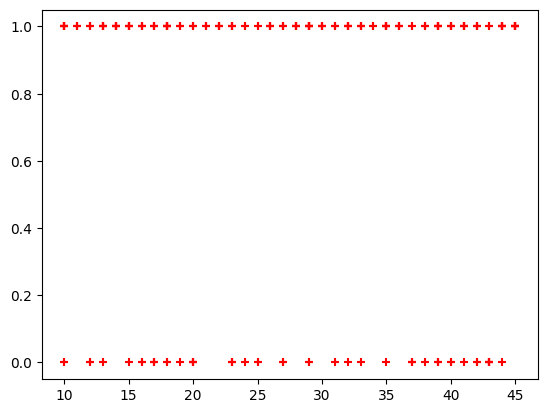

In [11]:
plt.scatter(df.Temperature,df.pump,marker='+',color='red')

In [12]:
# Plotted temperature and humidite against pump to get information regarding the need of pumps.

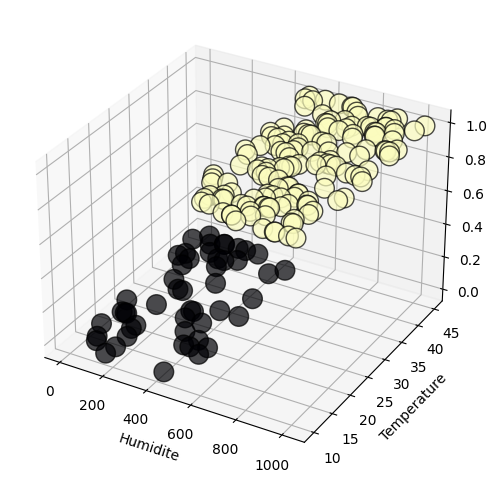

In [13]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Humidite, df.Temperature, df.pump,linewidths=1, alpha=.7,edgecolor='black',s = 200,c=df.pump, cmap='magma')
plt.xlabel("Humidite")
plt.ylabel("Temperature")
plt.show()

<Axes: >

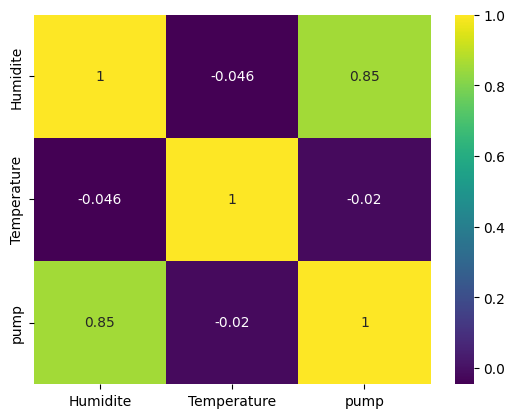

In [14]:
cormat = df.drop(['crop'], axis='columns').corr()
sns.heatmap(cormat, annot=True, cmap='viridis')

# SPLITTING THE DATA AS TRAINING AND TESTING SETS

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = df.drop(['pump','crop'], axis=1)
y = df['pump']
x.shape,y.shape

((200, 2), (200,))

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160,), (40,))

# MODEL EVALUATION

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

1.0

In [20]:
y_pred = lr.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

0.0

In [36]:
# Since we have got a score of 1.0, we were already expecting 0 MSE

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

In [51]:
model.fit(x=x_train,y=y_train,epochs=30)

Epoch 1/30
5/5 [==============================] - 0s 4ms/step - loss: 0.6219
Epoch 2/30
1/5 [=====>........................] - ETA: 0s - loss: 0.2398

5/5 [==============================] - 0s 3ms/step - loss: 0.2461
Epoch 3/30
5/5 [==============================] - 0s 2ms/step - loss: 0.5584
Epoch 4/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7141
Epoch 5/30
5/5 [==============================] - 0s 2ms/step - loss: 0.2089
Epoch 6/30
5/5 [==============================] - 0s 2ms/step - loss: 0.5161
Epoch 7/30
5/5 [==============================] - 0s 4ms/step - loss: 0.9588
Epoch 8/30
5/5 [==============================] - 0s 0s/step - loss: 0.1302
Epoch 9/30
5/5 [==============================] - 0s 0s/step - loss: 0.4914
Epoch 10/30
5/5 [==============================] - 0s 0s/step - loss: 0.7271
Epoch 11/30
5/5 [==============================] - 0s 4ms/step - loss: 0.2833
Epoch 12/30
5/5 [==============================] - 0s 4ms/step - loss: 0.3054
Epoch 13/30
5/5 [==============================] - 0s 4ms/step - loss: 0.9491
Epoch 14/30
5/5 [==============================] - 0s 4ms/step - loss: 0.2736
Epoch 15

In [54]:
model.evaluate(x_train,y_train, verbose=0)

0.4965527057647705

In [55]:
model.evaluate(x_test,y_test, verbose=0)

0.5896713137626648

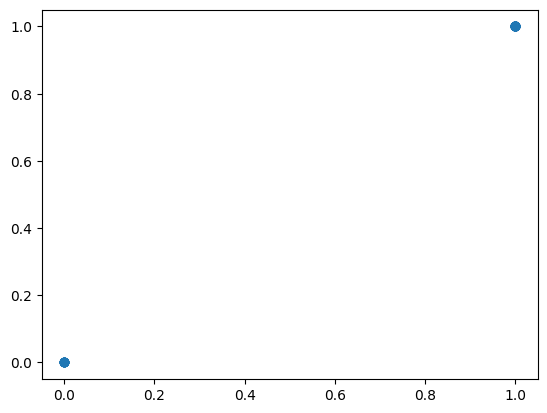

In [21]:
plt.scatter(y_test, y_pred)

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

1.0 : is the accuracy score
1.0 : is the precision score
1.0 : is the recall score
1.0 : is the f1 score


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        31

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



<Axes: >

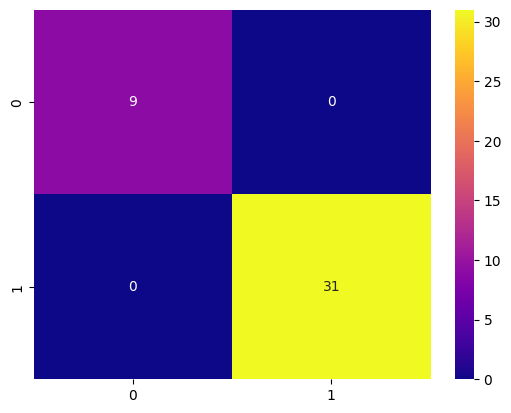

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='plasma')

# READING ALL OTHER IMPORTANT FILES

In [25]:
df2 = pd.read_csv('demo1.csv')
df3 = pd.read_csv('moisture_days.csv')
df4 = pd.read_csv('moisture_time.csv')

In [31]:
df2.head()

,[2020-06-18 14:59:59.094],1012,968,d
0,[2020-06-18 14:59:59.095],1011,953,d
1,[2020-06-18 14:59:59.095],1012,983,d
2,[2020-06-18 15:00:04.220],1012,980,d
3,[2020-06-18 15:00:10.024],1013,975,d
4,[2020-06-18 15:00:15.830],1013,970,d


In [32]:
df3.head()

,moisture,days
0,1176,1
1,1176,2
2,1176,3
3,1176,4
4,1176,5


In [26]:
df2.shape, df3.shape, df4.shape

((135, 4), (30, 2), (18, 2))

In [33]:
df4.head()

,Moisture,time
0,350,0.0
1,400,1.0
2,450,1.8
3,500,2.5
4,550,3.2


In [27]:
df2.isnull().sum()

[2020-06-18 14:59:59.094]     0
1012                          0
968                           0
d                             0
dtype: int64

In [28]:
df3.isnull().sum()

moisture    0
days        0
dtype: int64

In [29]:
df4.isnull().sum()

Moisture    0
time        0
dtype: int64

Text(0, 0.5, 'days')

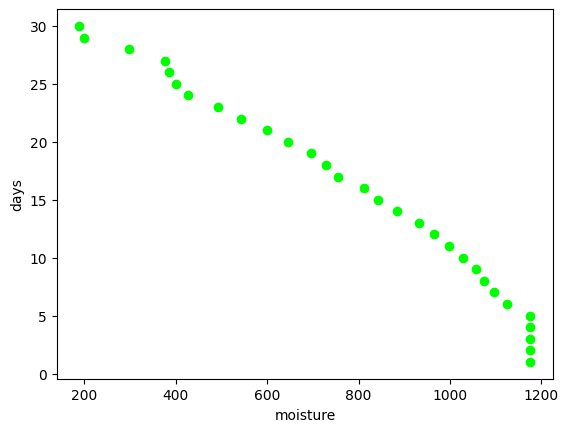

In [39]:
plt.scatter(df3.moisture, df3.days, color='lime')
plt.xlabel('moisture')
plt.ylabel('days')

Text(0, 0.5, 'days')

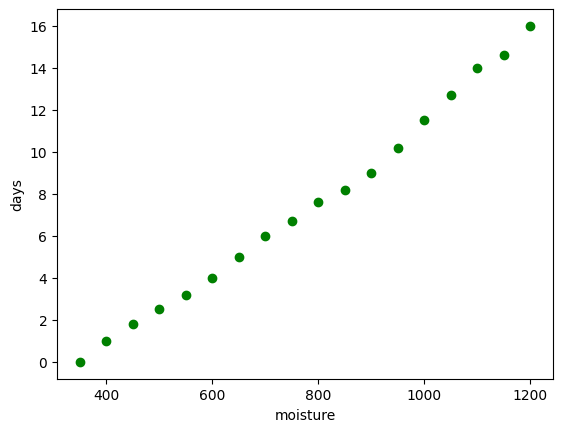

In [40]:
plt.scatter(df4.Moisture, df4.time, color='green')
plt.xlabel('moisture')
plt.ylabel('days')